In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import io
import copy

import omegaconf
from omegaconf import OmegaConf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_context('paper')
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
import seaborn.objects as so
import numpy as np
import pandas as pd
import torch
import wandb
import PIL

import plots
import utils

In [3]:
cfg = OmegaConf.load(utils.ROOT_DIR/'configs'/'wandb.yaml')
cfg = OmegaConf.create(dict(
    wandb=cfg,
    out_dir=(utils.ROOT_DIR/'../../out/rna_vel_pred/rna_vel_pred').resolve(),
    run_ids=['2uixz7e2'],
    split='test',
))
cfg

{'wandb': {'entity': 'taost', 'project': 'rna_vel_pred', 'run': None, 'dir': '${oc.select:..out_dir,.}', 'tags': []}, 'out_dir': PosixPath('/home/reepoi/out/rna_vel_pred/rna_vel_pred'), 'run_ids': ['2uixz7e2'], 'split': 'test'}

In [4]:
df = plots.histogram(cfg)
df

,Cosine Loss
0,0.362001
1,1.292606
2,0.824420
3,0.126919
4,0.176616
...,...
2085,1.139459
2086,0.530643
2087,1.018480
2088,0.263233


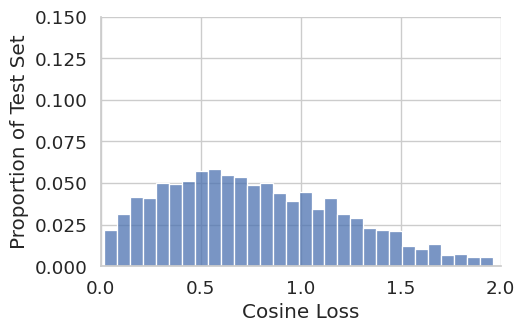

In [5]:
plot = (
    sns.displot(
        data=df,
        stat='proportion',
        x='Cosine Loss',
        height=3.5,
        aspect=1.5,
        bins=30,
        )
    .set_ylabels('Proportion of Test Set')
    .set(xlim=(0, 2), ylim=(0, .15))
)

In [6]:
plot.savefig(f'{cfg.run_ids[0]}.test.pdf')